<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/13_Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning
* 개념/ 아키텍처

* 예제(MNIST,Fashion-MNIST...)

$$인공지능 \supset 머신러닝 \supset 딥러닝 $$



In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data=np.array([2,4,6,8,10,12,14,16,18,20]).astype('float32')
t_data=np.array([0,0,0,0,0,0,1,1,1,1]).astype('float32')

In [4]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8,input_shape=(1,),activation='sigmoid'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [7]:
model.compile(tf.keras.optimizers.SGD(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(x_data,t_data,epochs=1000)

In [10]:
test_data=np.array([0.5,3.0,3.5,11,13,31])
sigmoid_value=model.predict(test_data)

logical_value=tf.cast(sigmoid_value>0.5,dtype=tf.float32)

for i in range(len(test_data)):
  print(test_data[i],
        sigmoid_value[i],
        logical_value.numpy()[i])

0.5 [0.00122553] [0.]
3.0 [0.00328958] [0.]
3.5 [0.00440681] [0.]
11.0 [0.45612264] [0.]
13.0 [0.7226455] [1.]
31.0 [0.97795624] [1.]


#MNIST

    머신러닝의 hello world


##데이터 정의
- load_data로 데이터 셋을 불러올 수 있다.

##데이터 전처리
- 학습 데이터가 이미지인 경우에는, 학습 데이터에 대한 정규화와 원핫 인코딩과 같은 데이터 전처리가 필요함
- 일반적으로 이러한 정규화 MinMax 또는 표준화 알고리즘을 사용하며, 원핫 인코딩은 TensworFlow에서는 to_categorical() API를 이용하여 수행됨

## 모델 구축 

- 일반적인 ANN에서는 Dense()를 사용하지만 ,CNN에서는 Conv2D(),MaxPool2D(),Flatten()등으로 은닉층 부분을 구성함

## 모델 컴파일 

- 정답을 원핫 인코딩으로 방식을 설정했다면 loss function 을 나타내는 부분은 loss='categorical_crossentropy'형식을 나타내며, 원핫 인코딩 방식이 아니라면 loss='sparse_categorical_crossentropy'형식으로 지정함

## 모델 학습

- model.fit()API를 이용하여 이미지 데이터에 대한 학습을 진행함

## 모델 평가 

- model.evaluate() 사용


##정규화 
- 0~1.0 사이의 값으로 변화 시키는 과정

##표준화
- 평균과 표준편차를 이용하여 특정 범위를 벗어난 데이터는 outlier로 간주하여 제거하는 과정

##원핫 코딩
- 정답의 개수와 동일한 크기를 가지는 리스트를 만든 후에
- 정답에 해당하는 리스트의 인덱스 값은 1 나머지는 0을 넣어서 정답을 표현하는 방식을 나타낸다
- 즉 리스트에서 가장 큰 값을 가지는 인덱스를 정답으로 인식 

In [17]:
mnist=tf.keras.datasets.mnist

(x_train,t_train),(x_test,t_test)=mnist.load_data()

#정규화
x_train,x_test=x_train/255,x_test/255
#정답 데이터 원핫 인코딩
t_train=tf.keras.utils.to_categorical(t_train,num_classes=10)
t_test=tf.keras.utils.to_categorical(t_test,num_classes=10)

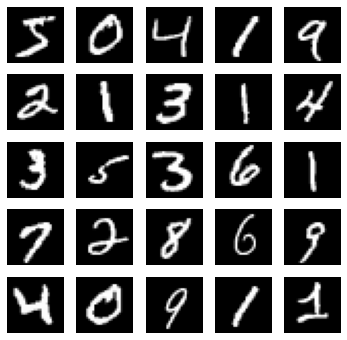

In [18]:
plt.figure(figsize=(6,6))

for index in range(25):
  plt.subplot(5,5,index+1)
  plt.imshow(x_train[index],cmap='gray')
  plt.axis('off')

plt.show()

In [20]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [23]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist=model.fit(x_train,t_train,epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3159 - accuracy: 0.9092 - val_loss: 0.1904 - val_accuracy: 0.9443
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1471 - accuracy: 0.9571 - val_loss: 0.1361 - val_accuracy: 0.9599
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1018 - accuracy: 0.9703 - val_loss: 0.1155 - val_accuracy: 0.9671
Epoch 4/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 0.1091 - val_accuracy: 0.9685
Epoch 5/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.1039 - val_accuracy: 0.9694
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.1023 - val_accuracy: 0.9700
Epoch 7/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.1079 - val_accuracy:

In [25]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9754


[0.1512400358915329, 0.9753999710083008]

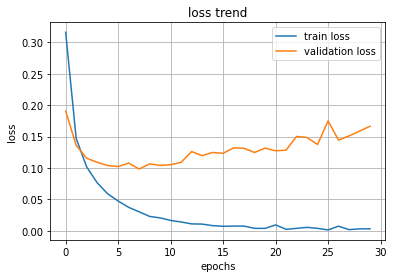

In [27]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()

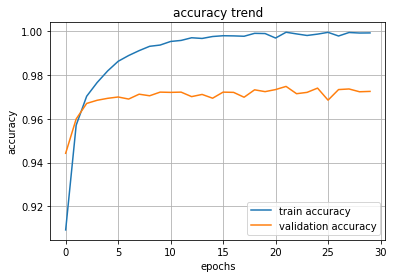

In [28]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()

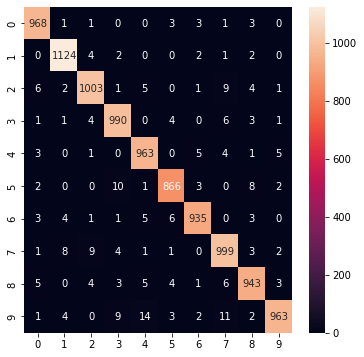

In [29]:
#혼동 행렬
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predict_value=model.predict(x_test)
cm=confusion_matrix(np.argmax(t_test,axis=1),
                    np.argmax(predict_value,axis=1))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [30]:
for i in range(10):
  print(('label=%d\t(%d/%d)\taccuracy=%.3f')%
        (i,np.max(cm[i]),np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))
  

label=0	(968/980)	accuracy=0.988
label=1	(1124/1135)	accuracy=0.990
label=2	(1003/1032)	accuracy=0.972
label=3	(990/1010)	accuracy=0.980
label=4	(963/982)	accuracy=0.981
label=5	(866/892)	accuracy=0.971
label=6	(935/958)	accuracy=0.976
label=7	(999/1028)	accuracy=0.972
label=8	(943/974)	accuracy=0.968
label=9	(963/1009)	accuracy=0.954
